# Dataset Introduction 

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

- train.7z - a folder containing the training images in png format
- test.7z - a folder containing the test images in png format
- trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

[Link for Dataset](https://www.kaggle.com/competitions/cifar-10)


# Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam 
from keras.datasets import cifar10
from keras.utils import np_utils, to_categorical
import time
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Turn off warnings for cleaner looking notebook
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
tf.config.list_physical_devices("GPU")

ImportError: cannot import name 'np_utils' from 'keras.utils' (c:\Users\thiru\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\utils\__init__.py)

# Loading the Data

In [2]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
X_train[123].min(), X_train[123].max()

(1, 243)

# Plotting Sample

(-0.5, 31.5, 31.5, -0.5)

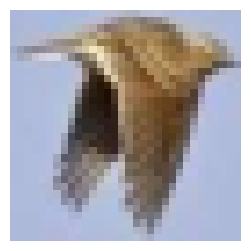

In [8]:
plt.figure(figsize=(4,3))
plt.imshow(X_train[123], cmap='gray')
plt.axis('off')

In [17]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [18]:
classes[y_train[123][0]]

'bird'

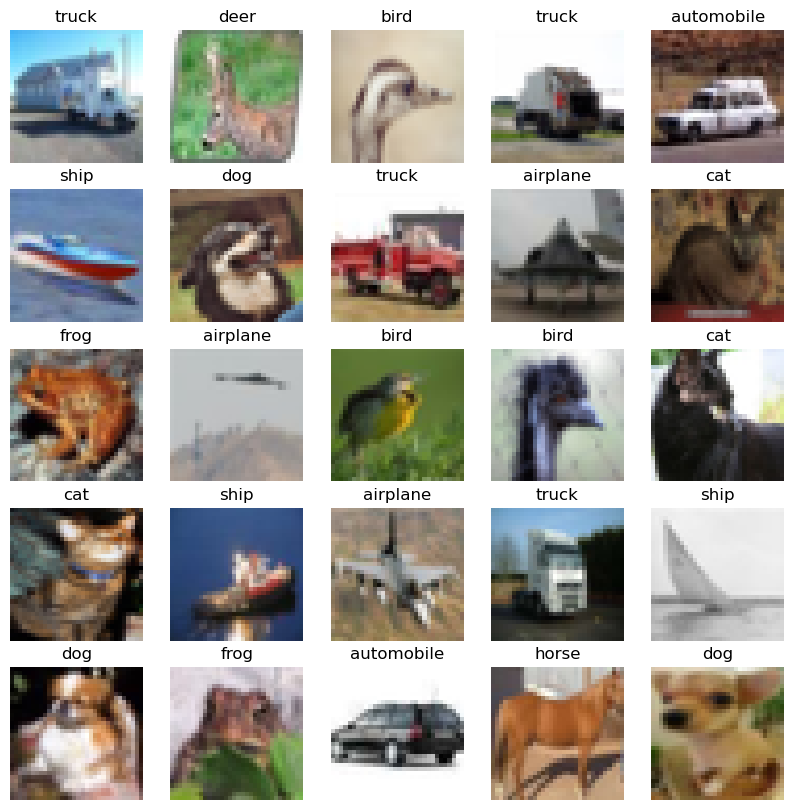

In [20]:
plt.figure(figsize=(10, 10))

for i in range(25):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

## Reshape the Data

In [21]:
# Normalization

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[123].min(), X_train[123].max()

(0.003921569, 0.9529412)

# Changing Dtype of Target Feature to Categorical

In [23]:
y_Example = to_categorical(y_train)

y_test_cat = to_categorical(y_test, 10)
y_train_cat = to_categorical(y_train, 10)
np.min(y_Example == y_train_cat), y_test_cat.shape

(True, (10000, 10))

In [24]:
y_train_cat[123]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

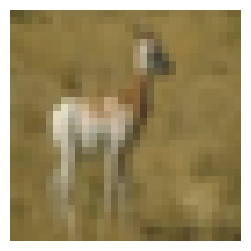

In [26]:
plt.figure(figsize=(4,3))
plt.imshow(X_train[58])
plt.axis('off')
plt.show()

# Convolutional Neural Network

## MODELLING - 1

In [34]:
# First Model

model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model1.add(MaxPool2D(2, 2))
model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = Adam(learning_rate = 1e-3))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               1605760   
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                      

# Early Stop

In [28]:
from tqdm import tqdm
# from keras_tqdm import TQDMCallback
from tqdm.keras import TqdmCallback

In [35]:
earlyStoppingCallback = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
fitData1 = model1.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_data=(X_test, y_test_cat), 
                    callbacks=[earlyStoppingCallback, TqdmCallback()], verbose=True)
fitData1

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
782/782 [==============================] - 5s 5ms/step - loss: 1.4877 - accuracy: 0.4625 - val_loss: 1.2958 - val_accuracy: 0.5362
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.1874 - accuracy: 0.5781 - val_loss: 1.1862 - val_accuracy: 0.5786
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.0452 - accuracy: 0.6317 - val_loss: 1.0809 - val_accuracy: 0.6153
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 0.9326 - accuracy: 0.6714 - val_loss: 1.0351 - val_accuracy: 0.6349
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 0.8509 - accuracy: 0.7011 - val_loss: 1.0184 - val_accuracy: 0.6466
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 0.7808 - accuracy: 0.7246 - val_loss: 1.0255 - val_accuracy: 0.6528
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 0.7144 - accuracy: 0.7500 - val_loss: 1.0060 - val_accuracy: 0.6604
Epoch 

# Plotting Metrics of the Model

In [36]:
model1.metrics_names

['loss', 'accuracy']

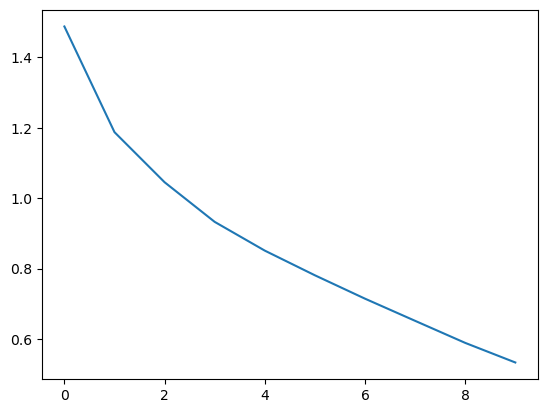

In [37]:
loss = model1.history.history['loss']
plt.plot(loss)
plt.show();

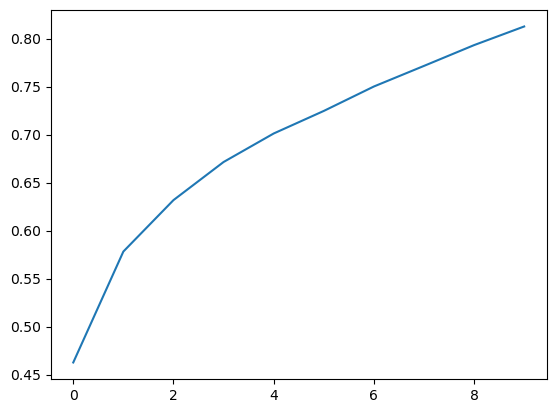

In [38]:
acc = model1.history.history['accuracy']
plt.plot(acc)
plt.show();

In [39]:
fitData1.history

{'loss': [1.4876538515090942,
  1.1874475479125977,
  1.0451701879501343,
  0.9325788021087646,
  0.8509182929992676,
  0.780846357345581,
  0.7144396305084229,
  0.6514981985092163,
  0.5888503789901733,
  0.5331882238388062],
 'accuracy': [0.46254000067710876,
  0.5781199932098389,
  0.6316800117492676,
  0.6713799834251404,
  0.7010800242424011,
  0.7245799899101257,
  0.7500399947166443,
  0.7714999914169312,
  0.7931600213050842,
  0.8125799894332886],
 'val_loss': [1.2957839965820312,
  1.1862012147903442,
  1.0808721780776978,
  1.0351349115371704,
  1.0183789730072021,
  1.0254871845245361,
  1.0060060024261475,
  1.1302077770233154,
  1.1871963739395142,
  1.1442863941192627],
 'val_accuracy': [0.5361999869346619,
  0.5785999894142151,
  0.6152999997138977,
  0.6348999738693237,
  0.6466000080108643,
  0.6528000235557556,
  0.6603999733924866,
  0.6349999904632568,
  0.6331999897956848,
  0.6485999822616577]}

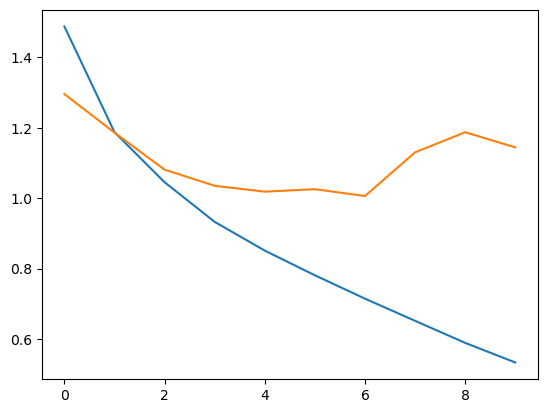

In [43]:
loss = fitData1.history['loss']
val_loss = fitData1.history['val_loss']
acc = fitData1.history['accuracy']
val_acc = fitData1.history['val_accuracy']

plt.plot(loss)
plt.plot(val_loss)
plt.show()

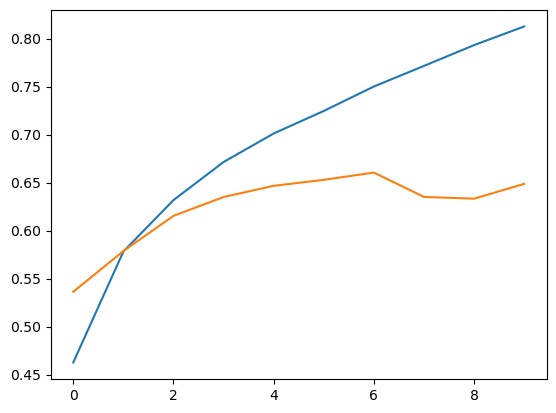

In [41]:
plt.plot(acc)
plt.plot(val_acc)
plt.show()

# Evaluation of the Model

In [44]:
import tensorflow_addons as tfa

ev1 = model1.evaluate(X_test, y_test_cat, 
                    callbacks=[tfa.callbacks.TQDMProgressBar()])

0/313           ETA: ?s - Evaluating

313/313 [==============================] - 1s 3ms/step - loss: 1.0060 - accuracy: 0.6604


# The Model Predict

In [45]:
y_preds = model1.predict(X_test)
y_preds

313/313 [==============================] - 1s 2ms/step


array([[1.7481988e-03, 1.1190798e-03, 1.1416443e-02, ..., 4.3174233e-03,
        8.6912282e-02, 1.3789481e-02],
       [1.0747034e-03, 5.2817142e-01, 4.4207854e-06, ..., 5.6640276e-10,
        4.7059271e-01, 1.4955104e-04],
       [8.9804813e-02, 9.5427567e-03, 4.8116017e-03, ..., 2.1960104e-03,
        8.7531781e-01, 3.4914962e-03],
       ...,
       [6.7771056e-05, 4.6460068e-06, 3.1337589e-02, ..., 9.8644411e-03,
        4.8116675e-05, 2.8286549e-05],
       [3.2179423e-02, 6.4523239e-03, 1.0031889e-02, ..., 6.8048290e-03,
        1.1478644e-04, 4.1901829e-05],
       [2.5996511e-05, 4.2407170e-05, 5.0764781e-04, ..., 9.1973615e-01,
        9.6676933e-07, 1.7146598e-05]], dtype=float32)

In [46]:
y_pred = np.argmax(y_preds, axis=1)
y_pred[0]

3

In [47]:
np.argmax(y_preds, axis=1)

array([3, 1, 8, ..., 5, 4, 7])

In [48]:
y_test_cat2 = np.argmax(y_test_cat, axis=1)

# Report and Heatmap

In [53]:
print(classification_report(y_test_cat2, y_pred, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.71      0.65      0.68      1000
  automobile       0.84      0.70      0.76      1000
        bird       0.53      0.52      0.53      1000
         cat       0.48      0.48      0.48      1000
        deer       0.56      0.66      0.60      1000
         dog       0.57      0.57      0.57      1000
        frog       0.74      0.76      0.75      1000
       horse       0.71      0.72      0.71      1000
        ship       0.76      0.80      0.78      1000
       truck       0.74      0.75      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



Our first model can predict with 66 % accuracy score. The best prediction is about automobiles with 84% and the worst prediction is about cats with 48%.

In [54]:
confusion_matrix(y_test_cat2, y_pred)

array([[650,  24,  92,  11,  47,   9,  14,  14,  96,  43],
       [ 36, 701,  18,  20,   9,   8,   6,  14,  48, 140],
       [ 48,   3, 520,  65, 139,  98,  59,  44,  14,  10],
       [ 18,   4,  87, 478,  91, 173,  76,  42,  16,  15],
       [ 14,   0,  71,  76, 656,  42,  56,  69,  13,   3],
       [  8,   4,  76, 176,  64, 569,  25,  59,  12,   7],
       [  7,   5,  47,  75,  58,  20, 762,  11,   6,   9],
       [ 19,   1,  47,  47,  81,  68,   8, 717,   4,   8],
       [ 68,  26,  11,  20,  14,   8,   9,   9, 802,  33],
       [ 42,  70,  11,  24,  13,   7,   9,  30,  45, 749]])

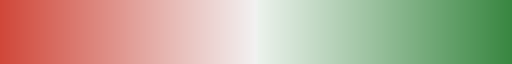

In [55]:
cmap = sns.diverging_palette(15, 130, as_cmap=True)
cmap

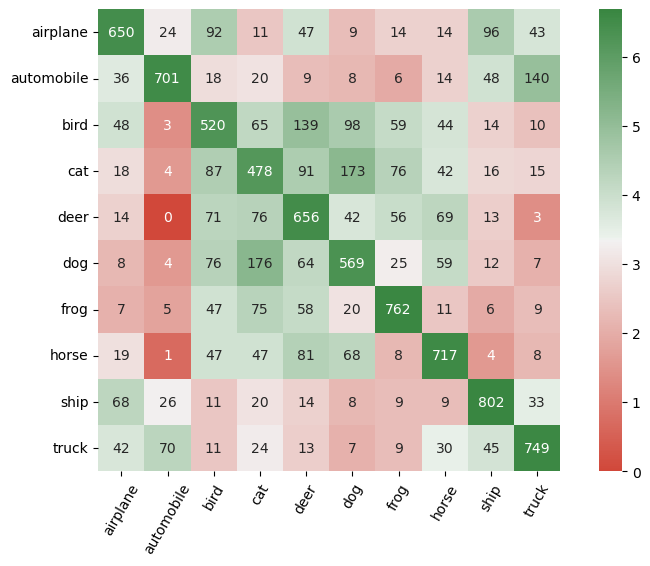

In [56]:
cm = confusion_matrix(y_test_cat2, y_pred)

plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt='d');

sns.heatmap(np.log1p(cm), annot=cm, cmap=cmap, fmt='d', 
            xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

The results are not that good, improvement is required.

## MODELLING - 2

In [58]:
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(4, 4), input_shape=(X_train.shape[1:]), activation='relu', padding='same'))
model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.5))  

model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.5))  

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=1e-3))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        16416     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [59]:
bar = tfa.callbacks.TQDMProgressBar()

fitData2 = model2.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_data=(X_test, y_test_cat),
                      callbacks=[earlyStoppingCallback, bar], verbose=True)
fitData2

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/782           ETA: ?s - 

Epoch 1/50


2023-07-10 20:14:26.824632: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 9s 10ms/step - loss: 1.6985 - accuracy: 0.3754 - val_loss: 1.4291 - val_accuracy: 0.4825
Epoch 2/50


0/782           ETA: ?s - 

Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 1.3817 - accuracy: 0.4992 - val_loss: 1.2564 - val_accuracy: 0.5577
Epoch 3/50


0/782           ETA: ?s - 

Epoch 3/50
782/782 [==============================] - 7s 10ms/step - loss: 1.2495 - accuracy: 0.5468 - val_loss: 1.1457 - val_accuracy: 0.5978
Epoch 4/50


0/782           ETA: ?s - 

Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1630 - accuracy: 0.5831 - val_loss: 1.0429 - val_accuracy: 0.6336
Epoch 5/50


0/782           ETA: ?s - 

Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0877 - accuracy: 0.6074 - val_loss: 0.9851 - val_accuracy: 0.6566
Epoch 6/50


0/782           ETA: ?s - 

Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0397 - accuracy: 0.6299 - val_loss: 0.9868 - val_accuracy: 0.6486
Epoch 7/50


0/782           ETA: ?s - 

Epoch 7/50
782/782 [==============================] - 7s 10ms/step - loss: 0.9938 - accuracy: 0.6457 - val_loss: 0.9914 - val_accuracy: 0.6506
Epoch 8/50


0/782           ETA: ?s - 

Epoch 8/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9638 - accuracy: 0.6553 - val_loss: 0.8901 - val_accuracy: 0.6966
Epoch 9/50


0/782           ETA: ?s - 

Epoch 9/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9361 - accuracy: 0.6661 - val_loss: 0.8792 - val_accuracy: 0.6975
Epoch 10/50


0/782           ETA: ?s - 

Epoch 10/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9100 - accuracy: 0.6762 - val_loss: 0.8637 - val_accuracy: 0.7022
Epoch 11/50


0/782           ETA: ?s - 

Epoch 11/50
782/782 [==============================] - 8s 10ms/step - loss: 0.8871 - accuracy: 0.6848 - val_loss: 0.8627 - val_accuracy: 0.7048
Epoch 12/50


0/782           ETA: ?s - 

Epoch 12/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8736 - accuracy: 0.6886 - val_loss: 0.8567 - val_accuracy: 0.6974
Epoch 13/50


0/782           ETA: ?s - 

Epoch 13/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8508 - accuracy: 0.6948 - val_loss: 0.8140 - val_accuracy: 0.7173
Epoch 14/50


0/782           ETA: ?s - 

Epoch 14/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8339 - accuracy: 0.7043 - val_loss: 0.8529 - val_accuracy: 0.6986
Epoch 15/50


0/782           ETA: ?s - 

Epoch 15/50
782/782 [==============================] - 8s 10ms/step - loss: 0.8257 - accuracy: 0.7066 - val_loss: 0.8134 - val_accuracy: 0.7150
Epoch 16/50


0/782           ETA: ?s - 

Epoch 16/50
782/782 [==============================] - 8s 10ms/step - loss: 0.8064 - accuracy: 0.7142 - val_loss: 0.7904 - val_accuracy: 0.7221
Epoch 17/50


0/782           ETA: ?s - 

Epoch 17/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7966 - accuracy: 0.7163 - val_loss: 0.7654 - val_accuracy: 0.7323
Epoch 18/50


0/782           ETA: ?s - 

Epoch 18/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7827 - accuracy: 0.7210 - val_loss: 0.7978 - val_accuracy: 0.7211
Epoch 19/50


0/782           ETA: ?s - 

Epoch 19/50
782/782 [==============================] - 8s 10ms/step - loss: 0.7790 - accuracy: 0.7228 - val_loss: 0.7710 - val_accuracy: 0.7284
Epoch 20/50


0/782           ETA: ?s - 

Epoch 20/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7664 - accuracy: 0.7274 - val_loss: 0.7796 - val_accuracy: 0.7281


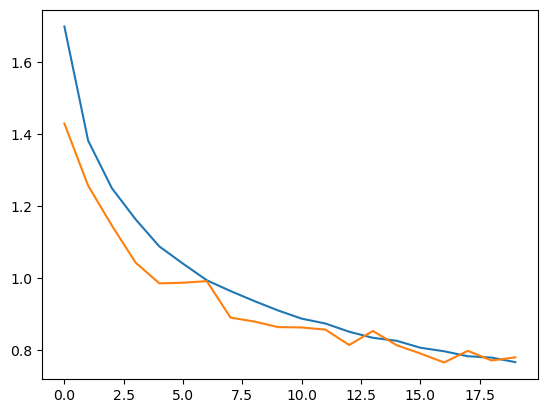

In [60]:
loss2 = fitData2.history['loss']
val_loss2 = fitData2.history['val_loss']
acc2 = fitData2.history['accuracy']
val_acc2 = fitData2.history['val_accuracy']

plt.plot(loss2)
plt.plot(val_loss2)
plt.show()

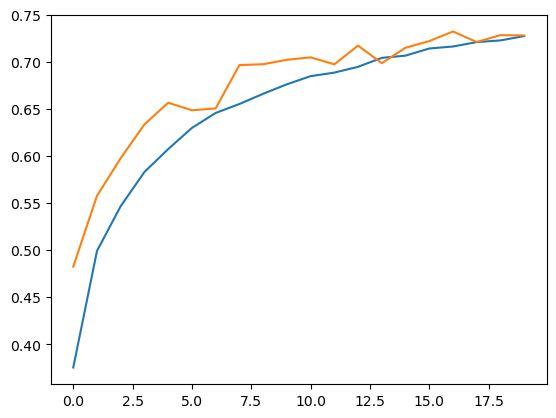

In [61]:
plt.plot(acc2)
plt.plot(val_acc2)
plt.show()

In [62]:
ev2 = model2.evaluate(X_test, y_test_cat, callbacks=[tfa.callbacks.TQDMProgressBar()])

0/313           ETA: ?s - Evaluating

313/313 [==============================] - 1s 3ms/step - loss: 0.7654 - accuracy: 0.7323


In [65]:
y_preds2 = model2.predict(X_test)
y_preds2

313/313 [==============================] - 1s 2ms/step


array([[1.1807964e-02, 5.1454948e-03, 2.2720244e-02, ..., 5.0821338e-02,
        4.7192741e-02, 7.7546784e-03],
       [1.1336332e-02, 1.8989040e-01, 1.9228886e-05, ..., 6.8457375e-06,
        7.9386103e-01, 4.8206523e-03],
       [1.7019954e-01, 5.5093080e-02, 6.4707985e-03, ..., 3.8523243e-03,
        6.8979150e-01, 6.2203553e-02],
       ...,
       [3.6406509e-05, 2.0739856e-06, 1.2353677e-02, ..., 3.3196767e-03,
        8.3892475e-05, 4.0010211e-05],
       [2.2149539e-01, 4.8906443e-01, 1.8553566e-02, ..., 8.9512290e-03,
        2.4773611e-03, 8.5476749e-03],
       [1.6817858e-06, 9.9767635e-07, 1.1444266e-04, ..., 9.9147052e-01,
        2.4037715e-07, 1.3590583e-06]], dtype=float32)

In [66]:
y_pred2 = np.argmax(y_preds2, axis=1)
y_pred2

array([3, 8, 8, ..., 5, 1, 7])

In [67]:
y_test_cat2_2 = np.argmax(y_test_cat, axis=1)

In [69]:
print(classification_report(y_test_cat2_2, y_pred2, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.76      0.78      0.77      1000
  automobile       0.84      0.86      0.85      1000
        bird       0.68      0.58      0.63      1000
         cat       0.54      0.55      0.54      1000
        deer       0.68      0.67      0.67      1000
         dog       0.61      0.60      0.60      1000
        frog       0.75      0.86      0.80      1000
       horse       0.83      0.74      0.78      1000
        ship       0.84      0.86      0.85      1000
       truck       0.78      0.84      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



- In this model our score is 73%, the best predictions are automobile and ship with 84%. 

- The results are much better, however we could upgrade it. 

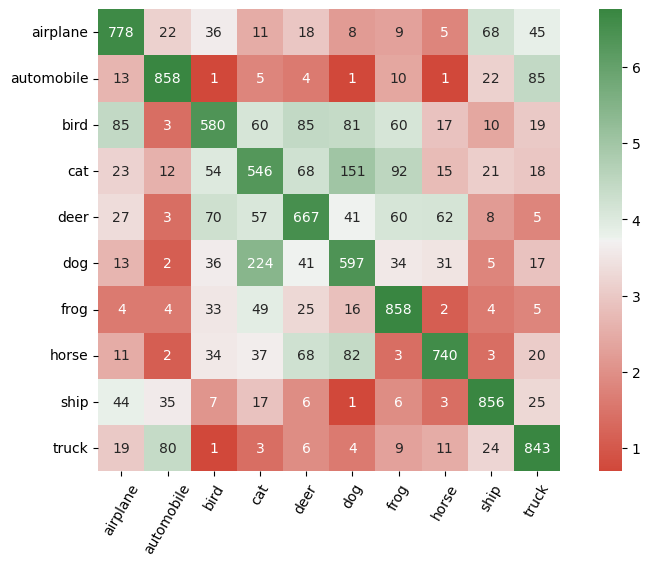

In [70]:
cm2 = confusion_matrix(y_test_cat2_2, y_pred2)

plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt='d');

sns.heatmap(np.log1p(cm2), annot=cm2, cmap=cmap, fmt='d',xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

## MODELLING - 3

In [71]:
from tensorflow.keras.layers import BatchNormalization

In [72]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(4, 4), input_shape=(X_train.shape[1:]), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(128, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(256, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(256, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.001))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        1568      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        32832     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [73]:
fitData3 = model3.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_data=(X_test, y_test_cat),
                      callbacks=[earlyStoppingCallback, TqdmCallback()], verbose=True)
fitData3

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
782/782 [==============================] - 21s 25ms/step - loss: 1.3449 - accuracy: 0.5145 - val_loss: 2.0112 - val_accuracy: 0.4506
Epoch 2/50
782/782 [==============================] - 19s 24ms/step - loss: 0.8250 - accuracy: 0.7133 - val_loss: 1.4911 - val_accuracy: 0.5829
Epoch 3/50
782/782 [==============================] - 18s 23ms/step - loss: 0.6241 - accuracy: 0.7872 - val_loss: 1.0339 - val_accuracy: 0.6638
Epoch 4/50
782/782 [==============================] - 19s 24ms/step - loss: 0.4878 - accuracy: 0.8338 - val_loss: 0.7359 - val_accuracy: 0.7651
Epoch 5/50
782/782 [==============================] - 18s 23ms/step - loss: 0.3793 - accuracy: 0.8700 - val_loss: 0.8130 - val_accuracy: 0.7524
Epoch 6/50
782/782 [==============================] - 18s 23ms/step - loss: 0.2899 - accuracy: 0.9022 - val_loss: 0.6060 - val_accuracy: 0.8073
Epoch 7/50
782/782 [==============================] - 18s 24ms/step - loss: 0.2232 - accuracy: 0.9239 - val_loss: 0.7377 - val_accuracy:

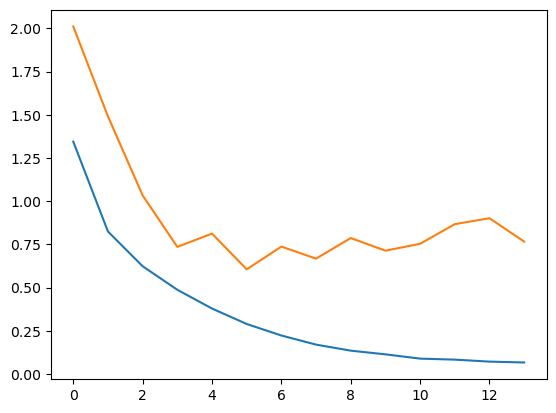

In [74]:
loss3 = fitData3.history['loss']
val_loss3 = fitData3.history['val_loss']
acc3 = fitData3.history['accuracy']
val_acc3 = fitData3.history['val_accuracy']

plt.plot(loss3)
plt.plot(val_loss3)
plt.show()

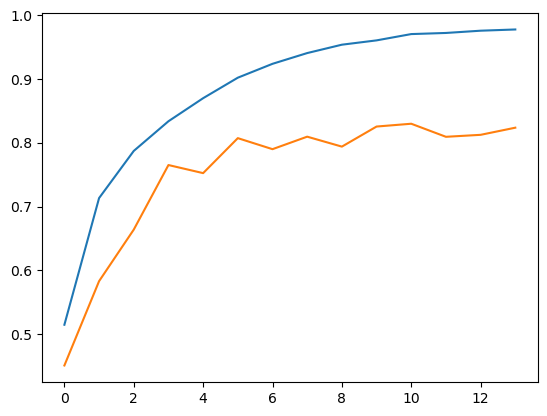

In [75]:
plt.plot(acc3)
plt.plot(val_acc3)
plt.show()

In [76]:
ev3 = model3.evaluate(X_test, y_test_cat, callbacks=[tfa.callbacks.TQDMProgressBar()])

0/313           ETA: ?s - Evaluating

313/313 [==============================] - 2s 7ms/step - loss: 0.7539 - accuracy: 0.8299


In [77]:
y_preds3 = model3.predict(X_test)
y_preds3

313/313 [==============================] - 2s 5ms/step


array([[3.62502923e-03, 3.23610473e-03, 4.13988950e-03, ...,
        1.65695138e-02, 1.50466722e-03, 2.68491618e-02],
       [1.48388981e-08, 1.16034698e-06, 4.61818908e-12, ...,
        1.51521005e-12, 9.99998569e-01, 2.83539919e-07],
       [1.57597214e-02, 4.37801808e-01, 1.07326414e-04, ...,
        4.65776902e-05, 4.67348993e-01, 7.80496076e-02],
       ...,
       [1.55576038e-10, 7.67527553e-08, 2.28234803e-05, ...,
        4.86515410e-06, 1.82600974e-08, 3.39050565e-10],
       [5.42817872e-07, 9.99886274e-01, 6.94625669e-07, ...,
        4.81389462e-09, 8.74731704e-05, 2.43488939e-05],
       [1.15883489e-08, 3.17433135e-10, 4.11185613e-10, ...,
        9.99998331e-01, 1.67327653e-12, 3.15148831e-08]], dtype=float32)

In [78]:
y_pred3 = np.argmax(y_preds3, axis=1)
y_pred3

array([3, 8, 8, ..., 5, 1, 7])

In [79]:
y_test_cat2_3 = np.argmax(y_test_cat, axis=1)

In [82]:
print(classification_report(y_test_cat2_3, y_pred3, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.83      0.87      0.85      1000
  automobile       0.93      0.92      0.92      1000
        bird       0.73      0.79      0.76      1000
         cat       0.70      0.66      0.68      1000
        deer       0.87      0.77      0.81      1000
         dog       0.79      0.76      0.77      1000
        frog       0.86      0.87      0.86      1000
       horse       0.83      0.87      0.85      1000
        ship       0.91      0.88      0.90      1000
       truck       0.85      0.93      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



- As we see above the results are quite good with 83% accuracy score.
- The best prediction is automobile with 93% precision score.
- The worst prediction is cat with 70% score.

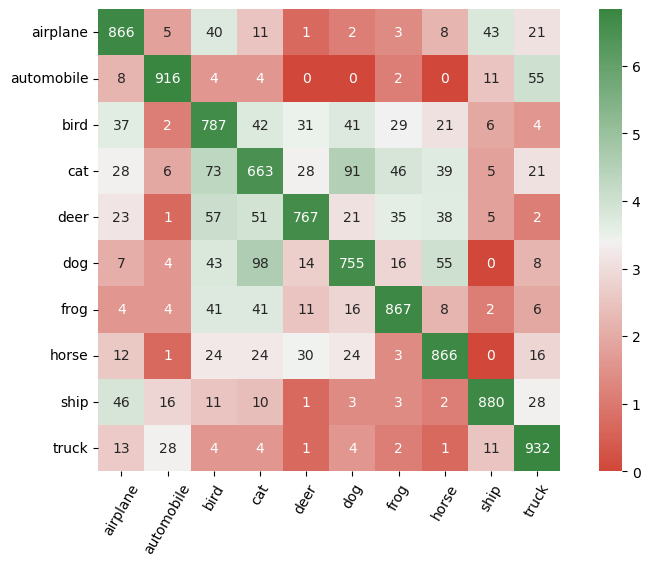

In [81]:
cm3 = confusion_matrix(y_test_cat2_3, y_pred3)

plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt='d');

sns.heatmap(np.log1p(cm3), annot=cm3, cmap=cmap, fmt='d',xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

**END**